# Data Description:

This data is about supermarket sales, and this data is for three diffrenet brnach over the period of three months between January 2019 to March 2019.Each row represent the purchase made by any customer or we can say Invoice ID.


**Below is brief description of each columns in our data.**



1. **Invoice id (Numerical):** Computer generated sales slip invoice identification number
2. **Branch (Categorical):** Branch of supercenter (3 branches are available identified by   A, B and C).
3. **City (Categorical):** Location of supercenters
4. **Customer type (Categorical):** Type of customers, recorded by Members for customers using member card and Normal for without member card.

5. **Gender (Categorical):** Gender type of customer
6. **Product line:** General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel
7. **Unit price (Numerical):** Price of each product 
8. **Quantity (Numerical):** Number of products purchased by customer
9. **Tax (Numerical):** 5% tax fee for customer buying
10. **Total (Numerical):** Total price including tax
11. **Date (Numerical):** Date of purchase (Record available from January 2019 to March 2019)
12. **Time (Numerical):** Purchase time (10am to 9pm)
13. **Payment (Categorical):** Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet) 14. **COGS (Numerical):** Cost of goods sold
15. **Gross margin percentage (Numerical):** Gross margin percentage
16. **Gross income (Numerical):** Gross income generated from particular product sold
17. **Rating (Numerical):** Customer statification rating on their overall shopping experience (On a scale of 1 to 10)

# Basic Understanding of Data

In [1]:
# Imporing required libraries for project

import pandas as pd # for data manipluation
import numpy as np  # for data calculations and statistical measurement
import matplotlib.pyplot as plt #for ineractive visualization charts
import seaborn as sns #for ineractive visualization charts
%matplotlib inline 
import warnings  # For warnings
warnings.filterwarnings("ignore") # To ignore unwanted warnings


import itertools
import statsmodels.api as sm # for applying stats model to do forecasting

In [2]:
# Uploading Data from local system to google colab
#from google.colab import files
#uploaded = files.upload()

In [3]:
# Uploading Data from local system to google colab
# Reading Dataset and loading into variable
#import io
#data = pd.read_csv('supermarket-sales - Sheet1.csv')

In [4]:
# Reading Dataset and loading into variable
data = pd.read_csv('supermarket-sales - Sheet1.csv')

In [5]:

# looking at first few rows of data
pd.set_option('display.max_columns', None)

data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [6]:
# structer Of data
data.shape

(1000, 17)

**There are a total 1000 rows and 17 columns in our data.**

In [7]:
# Checking data type and null values for each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

**From the above output we can see that most of the column is having proper data type but date column is not in proper format. we will change it to date time before starting our analysis. by combing date and time column and changing it's data type to datetime.**

In [8]:
# Checking for null values
data.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

**We can see that there are no missing values in our dataset, hence we do not need to perform any data handling process for our data.**

In [9]:
# Checking five Point Summary For All Numerical Columns
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


**Form the five point summary of numerical columns we can notice that highest individual total sale noted was 1042.650 and highest individual quantity sold was 10. Overall Average Customer rating is 6.97.**

In [10]:
# Exaploring unqie values of Branch column
data['Branch'].value_counts()

A    340
B    332
C    328
Name: Branch, dtype: int64

In [11]:

# Exaploring unqie values of City column
data['City'].value_counts()

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64

**After printing unique values and their counts for Branch and City column it seems that both are same meaning that if you observe then city column has 340 values of  city 'Yangon' and branch column has same 340 values of branch 'A'. The same thing you can notice for other two cities and branches. So, If we use either of the column for analysis it will be same.**

In [12]:
# Exaploring unqie values of Gender column
data['Gender'].value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

In [13]:
# Exaploring unqie values of Customer Type column
data['Customer type'].value_counts()

Member    501
Normal    499
Name: Customer type, dtype: int64

**There are 501 values for member customer type and 499 values for normal cutomer type.**

In [14]:
# Exaploring unqie values of Product line column
data['Product line'].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

**There are a total 5 unique values for product line column and the highest is Fashion and accessories product values are in product line column.**

In [15]:
# Exaploring unqie values of Payment column
data['Payment'].value_counts()

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64

**There are three unique values for payment and highest payment mode used is Ewallet.**

In [16]:
# Converting our date and time column to datetime
data['Date'] = pd.to_datetime(data['Date'])
data.head(2)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6


In [17]:
# Creating new column by combing date and time column
data['DateTime'] = pd.to_datetime(data.Date.astype('str')+' '+data.Time.astype('str'))

In [18]:
# Cross checking our changes 
print(data['DateTime'].dtype)

datetime64[ns]


In [19]:
#Pritinng data after making changes
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,DateTime
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,2019-01-05 13:08:00
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,2019-03-08 10:29:00
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,2019-03-03 13:23:00
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,2019-01-27 20:33:00
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2019-02-08 10:37:00


In [20]:
data.shape

(1000, 18)

In [21]:
#Creating a column for Hours
data['Hour'] = pd.to_datetime(data['Time'], format ='%H:%M').dt.hour
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,DateTime,Hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,2019-01-05 13:08:00,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,2019-03-08 10:29:00,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,2019-03-03 13:23:00,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,2019-01-27 20:33:00,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2019-02-08 10:37:00,10


**We can see that date column datatype is changed to datetime and also newly created column datetime is being added to our main data.**

# **Sales Forecast For City Yangon**

In [22]:
#Getting data only for city yangon
yangon = data.loc[data['City'] == 'Yangon']

In [23]:
#printing head of yangon data
yangon.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,DateTime,Hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,2019-01-05 13:08:00,13
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,2019-03-03 13:23:00,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,2019-01-27 20:33:00,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2019-02-08 10:37:00,10
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2019-02-25,14:36,Ewallet,413.04,4.761905,20.6520,5.8,2019-02-25 14:36:00,14


In [24]:
# printing columns for yangon data
yangon.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating', 'DateTime', 'Hour'],
      dtype='object')

In [25]:
# Removing all columns apart from date and total sales 
r_col = ['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating', 'DateTime', 'Hour']


yangon.drop(r_col, axis =1 , inplace=True)


In [26]:
# looking at data after dropping columns
yangon

,Total,Date
0,548.9715,2019-01-05
2,340.5255,2019-03-03
3,489.0480,2019-01-27
4,634.3785,2019-02-08
6,433.6920,2019-02-25
...,...,...
990,296.9400,2019-03-22
992,121.8630,2019-03-10
997,33.4320,2019-02-09
998,69.1110,2019-02-22


In [27]:
# changing order of column
yangon = yangon[["Date","Total"]]
yangon

,Date,Total
0,2019-01-05,548.9715
2,2019-03-03,340.5255
3,2019-01-27,489.0480
4,2019-02-08,634.3785
6,2019-02-25,433.6920
...,...,...
990,2019-03-22,296.9400
992,2019-03-10,121.8630
997,2019-02-09,33.4320
998,2019-02-22,69.1110


In [28]:
# sorting value for by date and seting index
yangon = yangon.sort_values('Date')

In [29]:
yangon

,Date,Total
696,2019-01-01,113.5680
245,2019-01-01,399.7560
567,2019-01-01,621.2430
17,2019-01-01,457.4430
829,2019-01-01,779.3100
...,...,...
559,2019-03-29,228.1230
937,2019-03-30,469.7700
883,2019-03-30,216.8460
474,2019-03-30,338.3100


In [30]:
yangon.set_index('Date', inplace=True)

In [31]:
yangon

,Total
Date,
2019-01-01,113.5680
2019-01-01,399.7560
2019-01-01,621.2430
2019-01-01,457.4430
2019-01-01,779.3100
...,...
2019-03-29,228.1230
2019-03-30,469.7700
2019-03-30,216.8460


In [32]:
yangon.columns

Index(['Total'], dtype='object')

In [33]:
#Resampling the data using Calender Day Frequency and taking their average
#yangon = yangon['Total'].resample('D').mean()
# D = Calendar Day frequency

In [34]:
yangon.head(4)

,Total
Date,
2019-01-01,113.568
2019-01-01,399.756
2019-01-01,621.243
2019-01-01,457.443


In [35]:
yangon.shape

(340, 1)

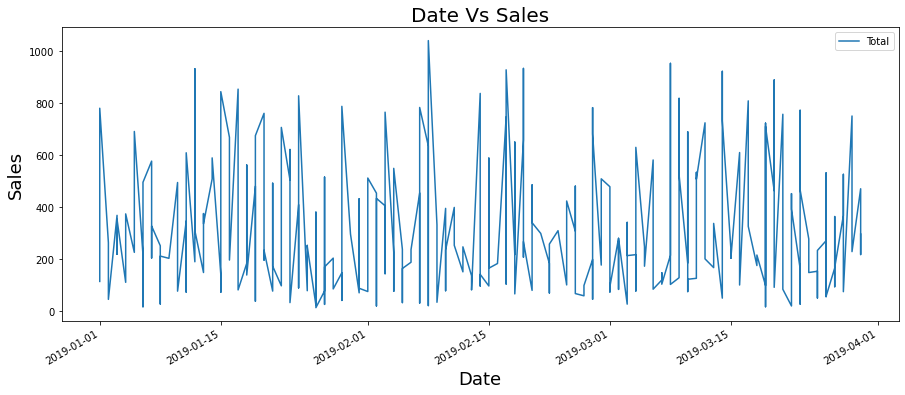

In [36]:
yangon.plot(figsize=(15,6),legend=True)
plt.ylabel("Sales",fontsize=18)
plt.xlabel("Date",fontsize=18)
plt.title("Date Vs Sales",fontsize=20)
plt.show()

# **Testing for Stationarity**

In [37]:
from statsmodels.tsa.stattools import adfuller

In [38]:
test_result = adfuller(yangon['Total'])

In [39]:
test_result

(-18.713510280720463,
 2.034195712964938e-30,
 0,
 339,
 {'1%': -3.4497880749874628,
  '5%': -2.870103829170425,
  '10%': -2.571332495975496},
 4427.586483799787)

#### **We're using Dickey Fuller Test here to test for stationarity. The Dickey Fuller Test gives us 5 values, namely - ADF Test Statitic, p-value, \#Lags used & Number of Observations used. However, our main focus here is on the p-value.**

#### **We are assuming our H0 as "Our data is not stationary" and H1 as "Our data is stationary".**

#### From the above 5 values, we see that our p-value is 2.034195712964938e-30 which is 0.000000000000000000000000000002034195712964938 in real numbers. Therefore, we can see that our p-value is less than 0.05 and hence we cannot accept our null hypothesis and that the data is stationary.

## **Resampling the data**

In [40]:
#Resampling the data using Calender Day Frequency and taking their average
yangon = yangon['Total'].resample('D').mean()
yangon.head()
# D = Calendar Day frequency

Date
2019-01-01    474.26400
2019-01-02    153.52575
2019-01-03    312.46950
2019-01-04    241.63125
2019-01-05    404.90100
Freq: D, Name: Total, dtype: float64

In [41]:
from pylab import rcParams as rc

In [42]:
rc['figure.figsize'] = 10, 14

In [43]:
decomposition = sm.tsa.seasonal_decompose(yangon,model='additive', freq=30)

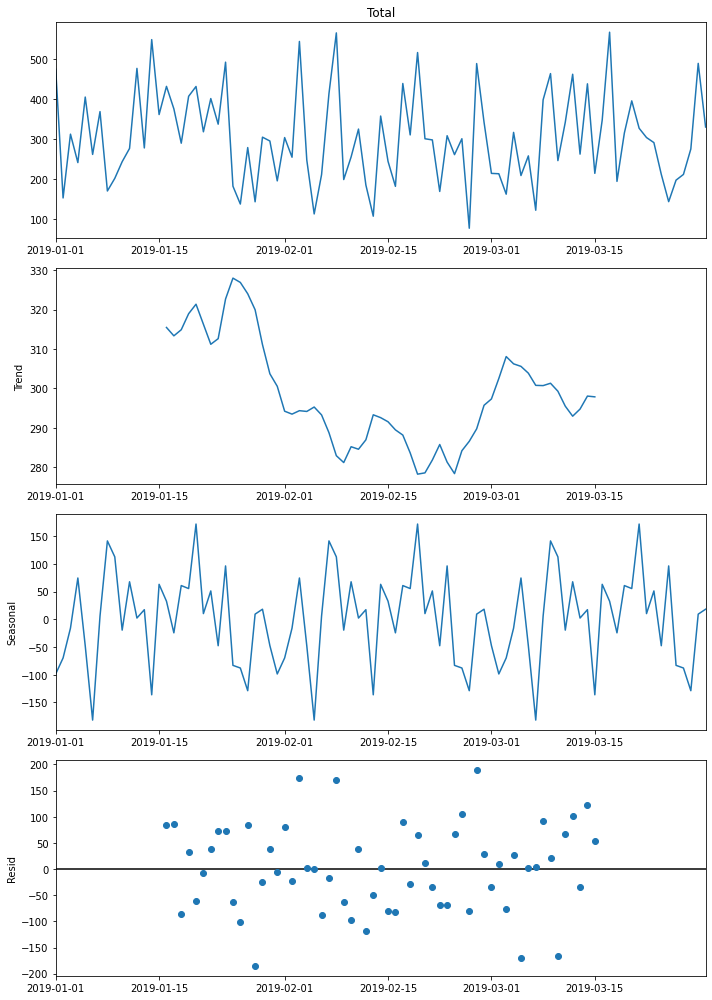

In [44]:
#Finding trend,seasonal,observed and residual values

fig = decomposition.plot()
plt.show()
# y(t) = Level + Trend + Seasonality + Noise --> Additive

# **Forecasting with ARIMA**

In [45]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

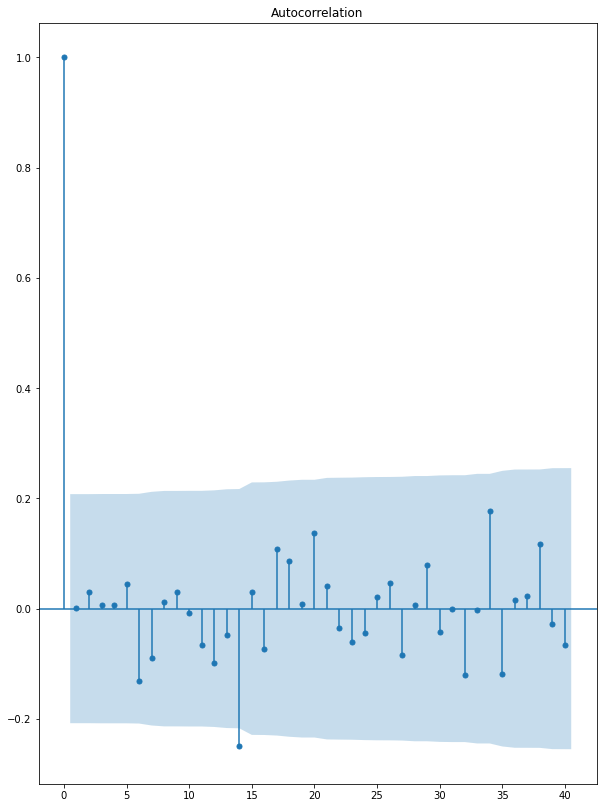

In [46]:
fig = sm.graphics.tsa.plot_acf(yangon, lags=40)

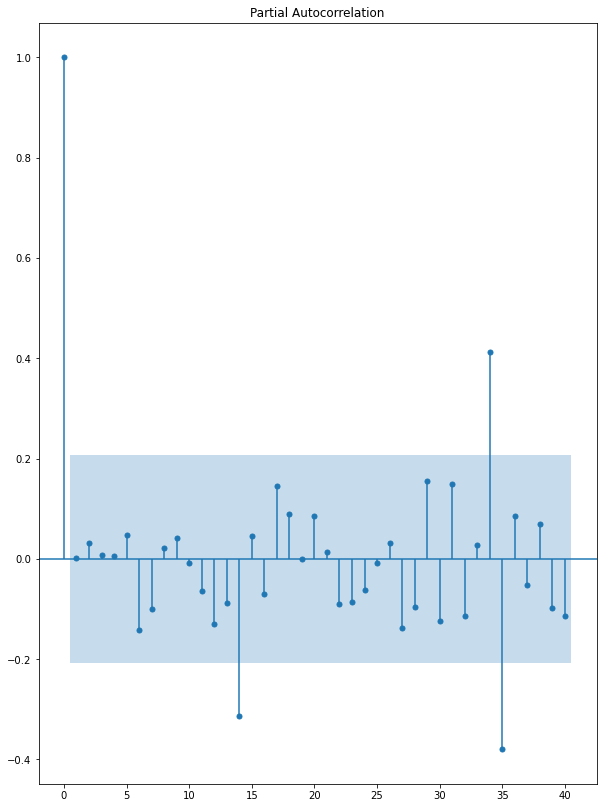

In [47]:
fig = sm.graphics.tsa.plot_pacf(yangon, lags=40)

In [48]:
p=d=q=range(0,2)

In [49]:
p,d,q

(range(0, 2), range(0, 2), range(0, 2))

In [50]:
pdq = list(itertools.product(p,d,q))

In [51]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [52]:
seasonal_pdq = [(x[0],x[1],x[2], 12) for x in pdq]

In [53]:
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [54]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(yangon,order = param, seasonal_order = param_seasonal ,
                                            enforce_stationarity= False , enforce_invertibility= False )
            results = mod.fit()
            
            print('ARIMA{} x {} 12 -- AIC : {}'.format(param, param_seasonal, results.aic))
            
        except:
             continue

ARIMA(0, 0, 0) x (0, 0, 0, 12) 12 -- AIC : 1268.4790506214556
ARIMA(0, 0, 0) x (0, 0, 1, 12) 12 -- AIC : 1060.6343088290512
ARIMA(0, 0, 0) x (0, 1, 0, 12) 12 -- AIC : 1001.7140380364299
ARIMA(0, 0, 0) x (0, 1, 1, 12) 12 -- AIC : 812.0784156744182
ARIMA(0, 0, 0) x (1, 0, 0, 12) 12 -- AIC : 1011.0389629292398
ARIMA(0, 0, 0) x (1, 0, 1, 12) 12 -- AIC : 969.5012887374811
ARIMA(0, 0, 0) x (1, 1, 0, 12) 12 -- AIC : 836.4208813787811
ARIMA(0, 0, 0) x (1, 1, 1, 12) 12 -- AIC : 813.0990512245264
ARIMA(0, 0, 1) x (0, 0, 0, 12) 12 -- AIC : 1200.7139050206033
ARIMA(0, 0, 1) x (0, 0, 1, 12) 12 -- AIC : 1019.4304477214092
ARIMA(0, 0, 1) x (0, 1, 0, 12) 12 -- AIC : 985.6139642854802
ARIMA(0, 0, 1) x (0, 1, 1, 12) 12 -- AIC : 800.4399802018265
ARIMA(0, 0, 1) x (1, 0, 0, 12) 12 -- AIC : 1011.7301409283691
ARIMA(0, 0, 1) x (1, 0, 1, 12) 12 -- AIC : 957.2214485153133
ARIMA(0, 0, 1) x (1, 1, 0, 12) 12 -- AIC : 838.1879348450133
ARIMA(0, 0, 1) x (1, 1, 1, 12) 12 -- AIC : 801.4092204434503
ARIMA(0, 1, 0) x 

C:\Users\modiv\Anaconda3_2019_10\envs\DAB303F20\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 0, 1) x (1, 0, 1, 12) 12 -- AIC : 939.6556694066593
ARIMA(1, 0, 1) x (1, 1, 0, 12) 12 -- AIC : 825.10202968893
ARIMA(1, 0, 1) x (1, 1, 1, 12) 12 -- AIC : 802.9129033056431
ARIMA(1, 1, 0) x (0, 0, 0, 12) 12 -- AIC : 1106.3198615665601
ARIMA(1, 1, 0) x (0, 0, 1, 12) 12 -- AIC : 960.6263497606659
ARIMA(1, 1, 0) x (0, 1, 0, 12) 12 -- AIC : 1007.9883036833901
ARIMA(1, 1, 0) x (0, 1, 1, 12) 12 -- AIC : 827.8676173205774
ARIMA(1, 1, 0) x (1, 0, 0, 12) 12 -- AIC : 960.498437347973
ARIMA(1, 1, 0) x (1, 0, 1, 12) 12 -- AIC : 962.1877818686926
ARIMA(1, 1, 0) x (1, 1, 0, 12) 12 -- AIC : 837.0098726123209
ARIMA(1, 1, 0) x (1, 1, 1, 12) 12 -- AIC : 829.4172404167741
ARIMA(1, 1, 1) x (0, 0, 0, 12) 12 -- AIC : 1069.0955341903214
ARIMA(1, 1, 1) x (0, 0, 1, 12) 12 -- AIC : 925.9891504960246
ARIMA(1, 1, 1) x (0, 1, 0, 12) 12 -- AIC : 978.9991241631197
ARIMA(1, 1, 1) x (0, 1, 1, 12) 12 -- AIC : 794.5924511068793
ARIMA(1, 1, 1) x (1, 0, 0, 12) 12 -- AIC : 936.2087089271448
ARIMA(1, 1, 1) x (1, 0, 

In [55]:

mod = sm.tsa.statespace.SARIMAX(yangon,
                               order=(1,0,1),
                               seasonal_order= (1,1,1,12),
                               enforce_stationarity = False,
                               enforce_invertibility=False)

In [56]:
results = mod.fit()

In [57]:
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7799      0.291     -2.678      0.007      -1.351      -0.209
ma.L1          0.8661      0.252      3.432      0.001       0.371       1.361
ar.S.L12      -0.1447      0.180     -0.804      0.421      -0.498       0.208
ma.S.L12      -0.7988      0.352     -2.271      0.023      -1.488      -0.109
sigma2       1.52e+04   4263.175      3.565      0.000    6841.837    2.36e+04


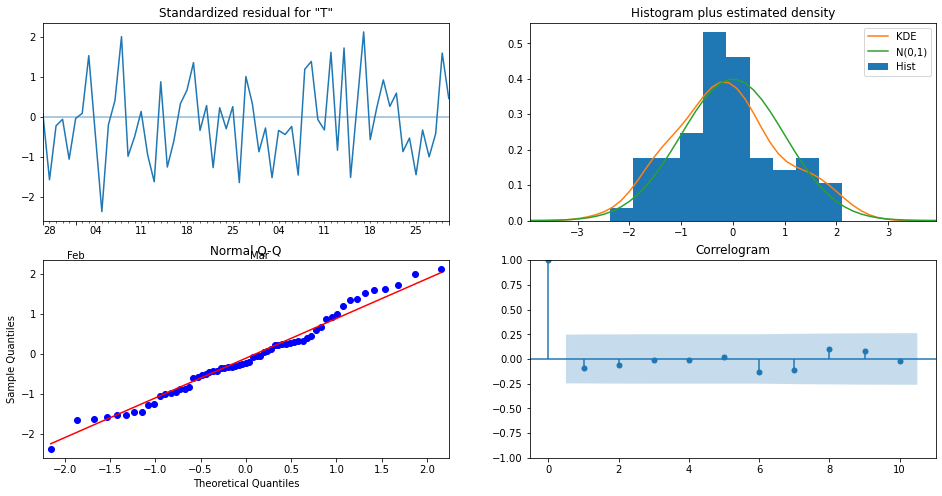

In [58]:
results.plot_diagnostics(figsize=(16,8))
plt.show()

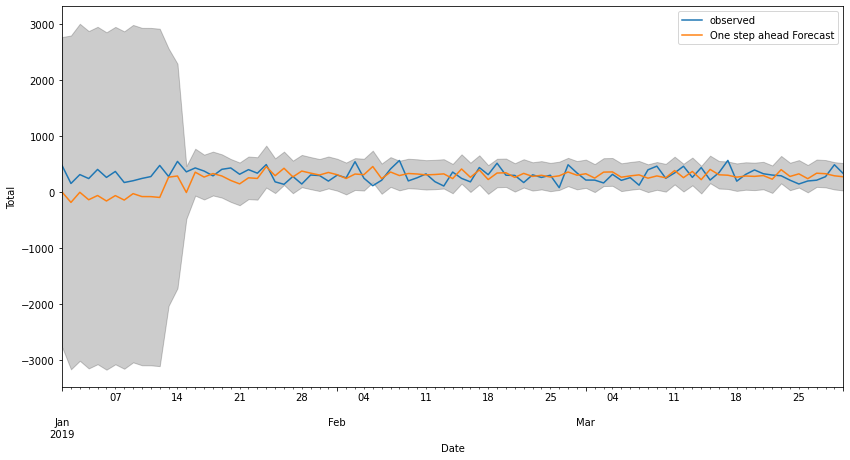

In [59]:
pred = results.get_prediction(start = pd.to_datetime('2019-01-01'), dynamic = False)
pred_ci = pred.conf_int()

ax = yangon['2019':].plot(label= 'observed')

pred.predicted_mean.plot(ax = ax, label = 'One step ahead Forecast',
                        alpha = 7, figsize= (14,7))

ax.fill_between(pred_ci.index,
               pred_ci.iloc[:,0],
               pred_ci.iloc[:,1],color = 'k', alpha= 0.2)

ax.set_xlabel('Date')
ax.set_ylabel('Total')
plt.legend()

plt.show()


In [60]:
yangon_forecasted = pred.predicted_mean
yangon_truth = yangon['2019-01-01':]
mse = ((yangon_forecasted - yangon_truth) ** 2).mean()

print('MSE of forecast :{}'.format(round(mse,2)))

MSE of forecast :38326.26


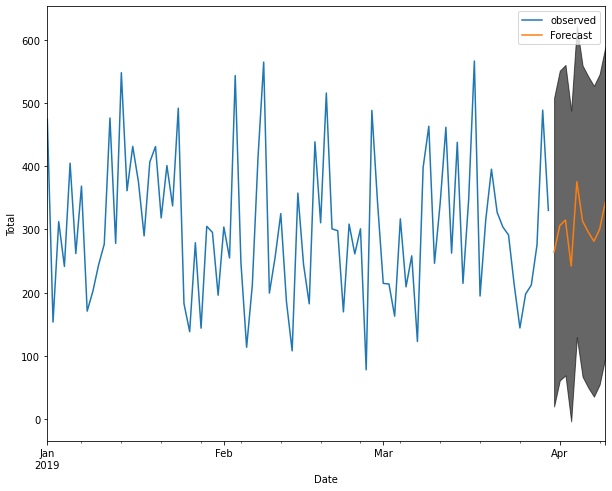

In [61]:
pred_uc = results.get_forecast(steps = 10)
pred_ci = pred_uc.conf_int()

ax = yangon.plot(label='observed', figsize=(10,8))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
               pred_ci.iloc[:,0],
               pred_ci.iloc[:,1],color='k',alpha=0.6)
ax.set_xlabel('Date')
ax.set_ylabel('Total')

plt.legend()
plt.show()

#### In the above graph we have used 10 step forecasting for preidcting the sales for the next 10 days.

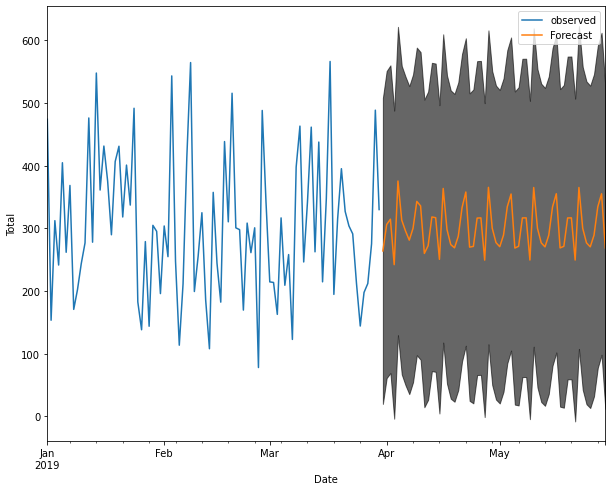

In [62]:
pred_uc = results.get_forecast(steps = 60)
pred_ci = pred_uc.conf_int()

ax = yangon.plot(label='observed', figsize=(10,8))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
               pred_ci.iloc[:,0],
               pred_ci.iloc[:,1],color='k',alpha=0.6)
ax.set_xlabel('Date')
ax.set_ylabel('Total')

plt.legend()
plt.show()

#### In the above graph, we have plotted for the next 50 days or we can also say that we are predicting for the next 2 months.

## Similarly you can do the forecasting for other two cities.